
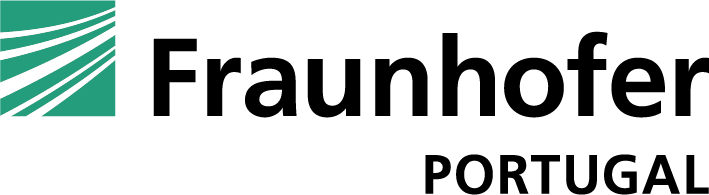

# Writing you first Deep Learn Convolutional network
This tutorial will give you the classification method in order to classify cats and dogs! Good luck!

First let's start by downloading the data that is available publicly from Kaggle:

https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition/data

## Prepare the dataset:


In [ ]:
%matplotlib inline

In [ ]:
import os  # dealing with directories
from random import (
    shuffle,
)  # mixing up or currently ordered data that might lead our network astray in training.

import cv2  # working with, mainly resizing, images
import matplotlib.pyplot as plt
import numpy as np  # dealing with arrays
import tensorflow as tf
from tqdm import (
    tqdm,
)  # a nice pretty percentage bar for tasks. Thanks to viewer Daniel BA1/4hler for this suggestion

TRAIN_DIR = "train"
TEST_DIR = "test"
IMG_SIZE = 50
LR = 1e-3

MODEL_NAME = "dogsvscats-{}-{}.model".format(
    LR, "2conv-basic"
)  # just so we remember which saved model is which, sizes must match

## Preparing label data

We are going yo make one-hot vectors for cat and dog. The cat will have the vector representation of [1, 0] and the dog will have the [1, 0] representation.

In [ ]:
def label_img(img):
    word_label = img.split(".")[-3]
    # conversion to one-hot array [cat,dog]
    #                            [much cat, no dog]
    if word_label == "cat":
        return [1, 0]
    #                             [no cat, very doggo]
    elif word_label == "dog":
        return [0, 1]

## Preparing train data

In this segment the data must be read from the filesystem, and resized to have the same size. In this example we are also going to make a gratscale of the image in order to reduce the number of channels and, therefore, processing time.

In [ ]:
def create_train_data():
    training_data = []
    for img in tqdm(os.listdir(TRAIN_DIR)):
        label = label_img(img)
        path = os.path.join(TRAIN_DIR, img)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        training_data.append([np.array(img), np.array(label)])
    shuffle(training_data)
    np.save("train_data.npy", training_data)
    return training_data

## Preparing test data

This is the same processing but for the test data

In [ ]:
def process_test_data():
    testing_data = []
    for img in tqdm(os.listdir(TEST_DIR)):
        path = os.path.join(TEST_DIR, img)
        img_num = img.split(".")[0]
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        testing_data.append([np.array(img), img_num])

    shuffle(testing_data)
    np.save("test_data.npy", testing_data)
    return testing_data

## Loading data

Comment the first and uncomment the second line if this has been already done before

In [ ]:
# train_data = create_train_data()
# If you have already created the dataset:
train_data = np.load("train_data.npy", allow_pickle=True)

## Building the architecture!

Now the exercise will need you to:
1. make two placeholders called input and output with sizes of (None, width, height, channels) and (None) dimensions  respectfully
2. make 3 convnets using tf.layers.conv2d and insert the input, filters, kernel_size, strides and name
3. after each convnets put a max pooling layer using tf.layers.max_pooling2d and check dimensions
4. after that use one dense layer of 1024 units and a relu activation
5. make a last variable called "logits" that has the last dense layer as input and no activation function and only 2 units (number of classes)


In [ ]:
filters = 16  # number of filters
kernel_size = [3, 3]  # the size of each filter
strides = [1, 1]  # how many "skips" are going to be made

## Preparing for training!!

Now we are going to prepare the optimizer function:
1. create a variable pred that will be the result of the classification
2. make the loss function using softmax_cross_entropy
3. make the variable op that is the minimization of the AdamOptimizer in realtionm to the loss
4. Open a session

In [ ]:
pred = 
loss = 
op = 

session = 

### Just a few preparations left to input data

In [ ]:
# defining some parameters
n_epochs = 50
batch_size = 16
Loss = []

train = train_data[:-1]
test = train_data[-1:]

X = np.array([i[0] for i in train]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
Y = np.array([i[1] for i in train])

test_x = np.array([i[0] for i in test]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
test_y = np.array([i[1] for i in test])

## Training!!

1. Now using session.run calculate the loss and the operation of optimization;
2. Use the feed_dict as {"placeholder1 name": "numpy input", "placeholder1 name": "numpy input"}
3. Calculate the accuracy
3. Monitorize the loss and the accuracy
4. After checking everything is ok, implement mini-batch optimization

In [ ]:
#INITIALIZE VARIABLES
for epoch in range(n_epochs):
    indexes = np.random.permutation(len(X))
    for i in range(0, len(X), batch_size):
        

    full_loss, prediction = 
    acc = np.sum(prediction == np.argmax(Y, axis=1)) / len(Y)
    print ("acc:",acc)
    

Now, implementing keras

In [ ]:
import keras


class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get("acc"))


history = AccuracyHistory()

In [ ]:
import keras
from keras import *
from keras.layers import * 
num_classes = 2

#Create a Sequential Model with 3 blocks of Conv2D followed by MaxPooling2D
#Then Flatten the result and apply two Dense layers (remember the final one has to have the number of nodes equal to number of classes)
model = 

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=LR),
              metrics=['accuracy'])

print(np.array(Y))
model.fit(np.array(X), np.array(Y),
          batch_size=batch_size,
          epochs=n_epochs,
          verbose=1,
          validation_data=(test_x, test_y),
          callbacks=[history])

score = model.evaluate(test_x, test_y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])